# **Python Setup**

In [2]:

#@title # Python Setup { display-mode: "form" }

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

#@markdown <font color="red"><h3><b><i> Begin by running this cell.</i></b></h3> </font>

#@markdown <font color="red"> ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ </font>

%pip install exifread &> /dev/null


import os, sys
if 'google.colab' in str(get_ipython()):
  print('Google Colab Environment - Loading Dependencies...')
  !rm -r ImageSTEM imageSTEAM &> /dev/null
  !git clone https://github.com/ImagingLyceum-ASU/ImageSTEAM.git &> /dev/null
  !mv ImageSTEAM/imageSTEAM ./
  !rm -r ImageSTEAM
else:
  print('Local iPython Environment')
  dir1 = os.path.dirname(os.path.abspath('../../'))
  if not dir1 in sys.path: sys.path.append(dir1)

import imageSTEAM as steam
from imageSTEAM import *

print('Environment Ready!')

Google Colab Environment - Loading Dependencies...
Environment Ready!


# **Introduction**

- What does it mean to rotate?
- Are images upside down? Are cameras? Are eyes?
- Flipping?

#  
<font color="red"> %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
</font>



# **Flipping an Image**

First thing, is how do we know whether we are looking at an image the right way? Luckily, we can test this out with code. Let's load an image in, and flip it.

###Start by running the cell below


In [4]:
import cv2
import numpy as np

import numpy as np

class ImageArray(np.ndarray):

    def __new__(cls, input_array):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        # add the new attribute to the created instance
        obj.length = len(input_array)
        if obj.length >= 1:
          obj.width = len(input_array[0])
        # Finally, we must return the newly created object:
        return obj

    def __array_finalize__(self, obj):
        # see InfoArray.__array_finalize__ for comments
        if obj is None: return
        self.info = getattr(obj, 'info', None)

def read(name):
  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return ImageArray(img)

def flip(src, direction='leftright'):
  if direction == 'leftright':
    print("true")
    fd = 1
    title = 'Left/Right'
  else:
    fd = 0
    title = 'Up/Down'
  display_img(cv2.flip(src, fd), title=title)

# Rotates the image
def rotate(rot, angle, origin, scale=1):
  pt_y = int(origin[1])
  pt_x = int(origin[0])

  rows = int(len(rot) * scale)
  cols = int(len(rot[0]) * scale)

  # rotation - get proper rc length for output?
  M = cv2.getRotationMatrix2D((pt_x,pt_y),angle,scale)
  dst = cv2.warpAffine(rot,M,(cols,rows))
  display_img(dst, title='Rotated ' + str(angle) + ' Degrees')

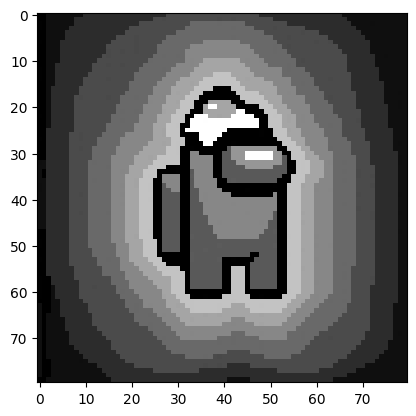

true


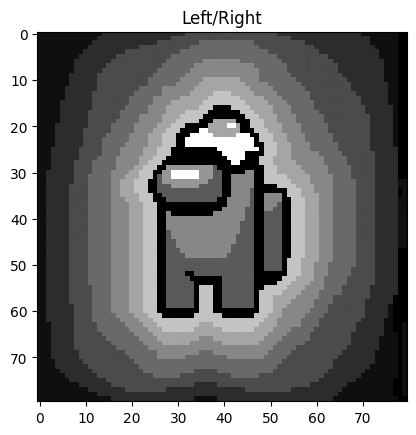

In [5]:

image = steam.data.amongUs()
display_img(image)

flip(image, direction='leftright')

Also instead of flipping left/right, we can also flip up/down.

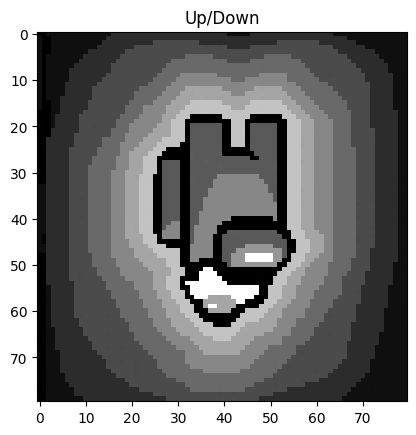

In [6]:
flip(image, direction='updown')

Now here's the tricky part. Why is a mirror flipped only LR, not UD? Watch this video for an explanation https://www.youtube.com/watch?v=vBpxhfBlVLU&ab_channel=PhysicsGirl




# **Tech-Free Lecture: Rotation**

What's an angle, what does it mean to rotate an image. How can we make a rotation look like a flip LR? How can we make it look like a UD?


# **Image Rotating**

First, we need to load an image in.


In [11]:
#TODO: use image load as a user prompt, store it in a variable called image
#image = read('')
image = steam.data.amongUs()
image = ImageArray(image)

Now let's do a rotation (around the top left hand corner) of 90 degrees counterclockwise.

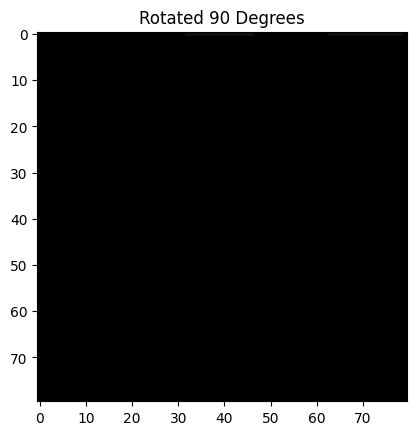

In [12]:
# TODO: do a naive rotation with left hand corner (0,0) being the pivot.
# This should result in a totally black image except one row as the image is completely rotated out, except the first column becomest hefirst row
origin = (0,0)
angle = 90

# Display, does this need to be hidden
rotate(image, angle, origin)

What happened? Why did it turn all black? Try 45 degrees, 20 degrees, see what happens

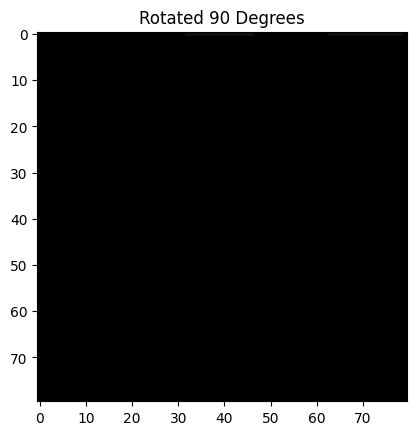

In [13]:
#Same function, show 45, 20 degress, so only part of the image is rotated out
origin = (0,0)
angle = 90

rotate(image, angle, origin)

The problem is the pivot point. Let's set the pivot point to the center of the image, then rotate.

80
80


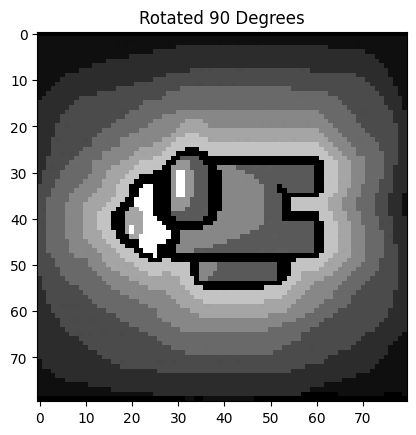

In [14]:
# TODO: Now do the correct rotation around the center ofthe image
print(image.length)
print(image.width)

origin = (40,40)
angle = 90

rotate(image, angle, origin)

That worked! You have to specify the pivot point you want, before you apply the rotate